# Simple Linear Regression

<img src="img/regression_cat_noclue.jpg" width="300">

## Objectives: 

- Use plots and summary statistics to describe the relationship between a target variable and a predictor variable.
- Apply a simple linear regression model to data and be able to interpret the r-squared value, p-values, and coefficients.
- Evaluate the assumptions of a linear regression model.


## CRoss-Industry Standard Process for Data Mining (CRISP-DM)

Before we dig into regression, lets talk about how this fits into the steps in the CRISP-DM model.

<img src="img/new_crisp-dm.png" width="400">


## Scenario

Amazon wants to know how they can increase sales revenue.  They have collected information about the number time customers spend on their website and the total sales they get from each customer.  

Is this a problem we can tackle using the methods of hypothesis testing we learned about last week?  Why or why not?


![](./img/Amazon.jpg)

----

## Regression Basics
Regression analysis is a tool to investigate how **independent variables**(continuous or categorical) are related to a **continuous dependent variable**. 

## Today's example:

Today we will be making a prediction about a person's __weight__ based on their __height__.


<img src="img/weight.jpg" width="300">

**Target Variable**
- Denoted, Y
- sometimes called the  response variable  or dependent variable
- weight

**Predictor Variable**
- Denoted, X
- sometimes called the explanatory variable or independent variable
- height

<img src="img/choosing_test.png" width="800">


---

### Reading in our data on height and weight

In [1]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
plt.style.use('seaborn')

In [2]:
#read in height weight data
weight_df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-071519-lectures/master/week-1/Descriptive_Statistics/weight-height.csv')

In [4]:
weight_df.head() 

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
weight_df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


## Setting the stage
In order to create a model that can make predictions for unseen data, we need to understand the relationship between the target variable and the predictor variable.

For a brief review of linear functions, recall that the equation of a line has the following form:
$$y=mx+b$$

where $m$ is the slope and $b$ is the y-intercept.



<img src="slope-equation.png" style="width:400px;" >

Given two points on a line, ($x_1$ and $y_1$) and ($x_2$ and $y_2$) , the slope is calculated by:

\begin{align} m&=\dfrac{y_2-y_1}{x_2-x_1}\\&=\dfrac{\text{change in y}}{\text{change in x}}\\&=\frac{\text{rise}}{\text{run}} \end{align}

In order to be confident that our model will represent the relationship between two variables, we need to be sure there is a linear relationship between the two.  Let's examine the data for a linear relationship.

## Your Turn:

<img src="img/talking.jpeg" width="60" align='left'>

</br>

With a classmate answer the following questions.


#### Question 1:

If we want to visually examine if there is relationship between two continuous variables what type of graphic should we use?  Then create that visualization using our height and weight data.

Answer: 

Text(0.5, 1.0, 'Height vs. Weight')

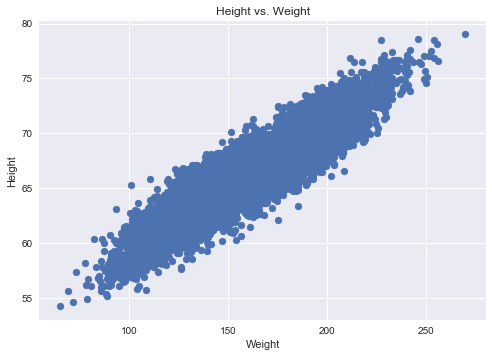

In [7]:
##code here
x = weight_df.Weight.values
y = weight_df.Height.values

plt.scatter(x,y)
plt.ylabel('Height'); plt.xlabel('Weight')
plt.title('Height vs. Weight')

### Question:  

If we want to provide a measure of the strength of the linear relationship between two quantitative variables, what is the name of the measure we would like to use?  Then calculate that measure and explain what it means.

Answer:

In [9]:
## code here
##Correlation - pearson's R as metric because 2 continuous variables
import scipy
scipy.stats.pearsonr(x, y) ##.92 correlation is close to 1, so strong positive correlation

##can also use:
weight_df.corr()


,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


___

### Sample Correlation Coefficient

The sample correlation coefficient is typically denoted as $r$. It is also known as Pearson’s $r$. The population correlation coefficient is generally denoted as  $\rho_1$, pronounced “rho.”

<img src='http://www.cqeacademy.com/wp-content/uploads/2018/06/Scatter-Plots-and-Correlation-Examples.png' width="900">


#### Note: Correlation does not imply causation!!
<img src='./img/CC.png' width="600">

## Simple Linear Regression Model

A simple linear regression model is one in which we use just one predictor variable is used to predict our continuous target variable.

The general form of the simple linear regression model is...

$$Y=\beta_0+\beta_1X+\epsilon$$

where,

$Y$ is our target variable

$X$ is our predictor variable

$\beta_0$ is the population y-intercept and represents the average Y value when X is 0

$\beta_1$ is the population slope and represents the slope between X and Y

$\epsilon_i$ is the errors of prediction (the difference between the actual observed value and the predicted value

![](./img/linear-regression.png)

How do we know which line is the best fit?

**It is the line that minimizes our errors, also called residuals.**

### Residual
The distance between the observed value of $Y$ and the predicted value of $Y$ is called the residual.

![](./img/residuals.png)

### Least Squares Line
The least squares line is the line for which the sum of squared errors of predictions for all sample points is the least.

$$SSR = \sum_{i=1}^n (\hat{y} - \bar{y})^2$$

<img src="https://www.stevejburr.com/post/2019-03-27-scatter-plots-and-best-fit-lines_files/figure-html/unnamed-chunk-2-1.png" width="600" >

## Fitting a Model in Python

For today's lesson we are going to use the [statsmodel ols function from the formula api](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) which is very similar to the format in R.

In [12]:
# building a linear regression model using statsmodel 
lr_model = ols(formula='Weight~Height', data=weight_df).fit()  # specifying the model with weight as our target variable

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Mon, 29 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:49:24   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -350.7372      2.111   -166.109      0.000    -354.876    -346.598
Height         7.7173      0.032    242.975      0.000       7.655       7.780
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Your Turn:

<img src="img/talking.jpeg" width="60" align='left'>

</br>

With a classmate write out the interpretation of the model output


### 1 - Interpreting the coefficent for height, $\hat{\beta}_1$ 
$\hat{\beta}_1$ represents the estimated increase in $Y$ per unit increase in $X$. Note that the increase may be negative which is reflected when $\hat{\beta}_1$ is negative.
 

Answer 1: 7.17173. For every 1 inch increase in height, weight will be expected to increase by 7.7173 pounds (assumed)

### 2 - Interpreting the intercept, $\hat{\beta}_0$
$\hat{\beta}_0$ is the intercept of the regression line. When $X=0$ is within the scope of observation, $\hat{\beta}_0$ is the estimated value of $Y$ when $X=0$ .

Answer 2:  When x = 0, y = -350. When weight is zero

### 3 -Take the output of model summary and use it to rewrite the model with actual values?

$$\hat{
y}=\beta_0+\beta_1x$$

Where $\hat{y}$ is the predicted value of y(weight)  at a given x (height)

Answer 2: predicted_weight = -350.73 + 7.7173 * (height)

## Why is there a p-value for the coefficient??

If we think about linear regression as a way to test if there is a relationship between two variables, then we can translate it to a hypothesis test:

$H_0\colon \beta_1=0$

$H_a\colon \beta_1\ne0$

With this in mind, how would you interpret the p-value for our predictor in this output?

Answer: There is a significant relationship between height and weight because the observed p-value is less than any of our usual critical p-values set by alpha(.10, .05, .01)

## R-squared Values

R-squared values, also known as the **coefficient of determination**, are a measure of model fit and are defined as the proportion of variance explained by our predictors. It always takes on a value between 0 and 1, and is independent of the scale of Y.

R-squared values are often used to evaluate our model fit. Higher r-squared values indicate better model fits.

In our height and weight example we had a r-squared value of .86 which can be interpreted as: height explains 86% of variation in weight.  

Note: In a simple linear regression model the squared correlation between the variables is equal to the r-squared value.

In [27]:
corr =.925
squared_corr = corr**2
squared_corr

0.8556250000000001

## Assumptions for Simple Linear Regression
#### 1. **Linearity**: The relationship between $X$ and $Y$ must be linear.
    - Check this assumption by examining a scatterplot of x and y.

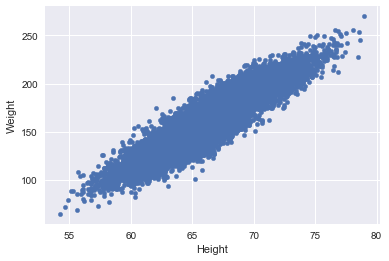

In [6]:
weight_df.plot.scatter(x='Height', y='Weight')

#### Did we meet the assumption of linearity?

Yes, it is clear from the scatterplot that there is a linear relationship between height and weight

#### 2. **Independence of errors**: There is not a relationship between the residuals and the  $Y$  variable; in other words, $Y$ is independent of errors.
   - Check this assumption by examining a scatterplot of “residuals versus fits”; the correlation should be approximately 0. In other words, there should not look like there is a relationship.
    
#### 3. **Equal variances**: The variance of the residuals is the same for all values of $X$.
   - Check this assumption by examining the scatterplot of “residuals versus fits”; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.

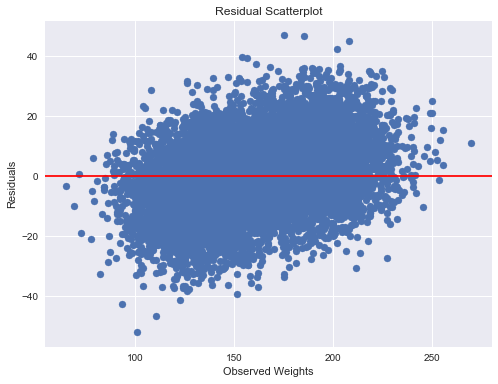

In [13]:
# creating a residuals plot
pred_val = lr_model.fittedvalues.copy()
true_val = weight_df['Weight'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(weight_df['Weight'],residual)
ax.set_title('Residual Scatterplot')
ax.set_xlabel('Observed Weights')
ax.set_ylabel('Residuals')
ax.axhline(y=0, color ='r')
plt.show()

#### Did we meet the assumption of Independence of Errors?

Yes, it looks like the correlation between the residuals and our observed weights is zero.

#### Did we meet the assumption of Equal Variances?

Yes, it looks like variance of residuals is approximately the same across values of weight.  We so not see a cone shape in the residuals

#### 4. **Normality of errors**: The residuals must be approximately normally distributed.
   - Check this assumption by examining a normal probability plot (otherwise referred to as a QQ plot); the observations should be near the line. You can also examine a histogram of the residuals; it should be approximately normally distributed.


((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([-51.93373047, -46.70036118, -42.55403182, ...,  45.14088139,
          46.64602725,  46.84388996])),
 (12.221424481473655, -3.198387524611845e-13, 0.9998756760091045))

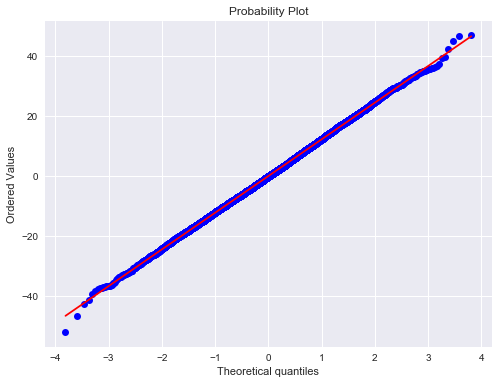

In [14]:
# checking for normality - QQ plot 
fig, ax = plt.subplots(figsize=(8,6))
sp.stats.probplot(residual, plot=ax, fit=True)

(array([1.000e+00, 2.000e+00, 6.000e+00, 3.300e+01, 8.200e+01, 1.970e+02,
        4.300e+02, 7.780e+02, 1.193e+03, 1.490e+03, 1.636e+03, 1.408e+03,
        1.151e+03, 7.550e+02, 4.870e+02, 2.070e+02, 1.010e+02, 3.600e+01,
        3.000e+00, 4.000e+00]),
 array([-51.93373047, -46.99484945, -42.05596842, -37.1170874 ,
        -32.17820638, -27.23932536, -22.30044434, -17.36156332,
        -12.4226823 ,  -7.48380127,  -2.54492025,   2.39396077,
          7.33284179,  12.27172281,  17.21060383,  22.14948486,
         27.08836588,  32.0272469 ,  36.96612792,  41.90500894,
         46.84388996]),
 <a list of 20 Patch objects>)

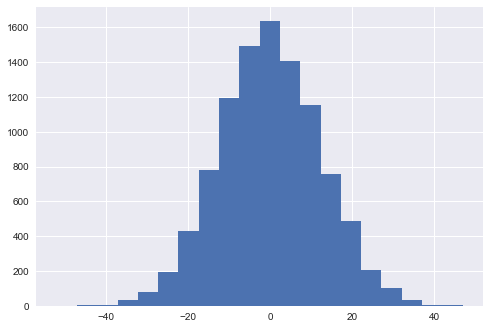

In [15]:
plt.hist(residual, bins=20)

#### Did we meet the assumption of Normality of Errors?

Yes, it looks like most of our observations are near the line.  This is further confirmed with the histogram of residuals

___

## Cautions with Linear Regression

1. **Use extrapolation with caution.** 

Extrapolation is applying a regression model to X-values outside the range of sample X-values to predict values of the response variable . For example, you would not want to use a height of 12 inches height to predict the weight of a baby using a regression model that was fit to adult observations.

2. **The fact that there is no linear relationship (i.e. correlation is zero) does not imply there is no relationship altogether.** 

The scatter plot will reveal whether other possible relationships may exist. The figure below gives an example where X, Y are related, but not linearly related i.e. the correlation is zero.

<img src='https://statistics.laerd.com/spss-tutorials/img/pc/linear-non-linear.png' width="600">

We can look at Anscomb's Quartet to see when linear regression might not be the best model and why data visualization is so important prior to modeling.

[Anscomb's Quartet Desmos](https://www.desmos.com/calculator/paknt6oneh)

[Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

### Outliers and Influential Observations
Influential observations are points whose removal causes the regression equation to change considerably.


https://www.desmos.com/calculator/jwquvmikhr

---

Additional Resources and Videos

[Deriving the least squares estimators of the slope and intercept](https://www.youtube.com/watch?v=nk2CQITm_eo)

[StatQuest: Linear Models Pt.1 - Linear Regression](https://www.youtube.com/watch?v=ewnc1cXJmGA)

## More info on the calculations
### Sample Slope
$\hat{\beta}_1=\dfrac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sum (x_i-\bar{x})^2}$

### Sample Intercept

$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$